# Scratch Artificial Neural Network

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import sys
sys.dont_write_bytecode = True

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType

# Pipeline for testing MNIST dataset

In [3]:
input_size = 784
hidden_layers = 2
hidden_size = 128
output_size = 10
learning_rate = 0.001
param_1 = 0
param_2 = 0
batch_size = 128

In [4]:
# Load MNIST dataset using fetch_openml
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

Loading MNIST dataset...


In [5]:
def batch_generator(X, y, batch_size, shuffle=True):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)

    if shuffle:
        np.random.shuffle(indices)

    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]

In [6]:
# Create train_loader and test_loader as generator objects
train_loader = lambda: batch_generator(X_train, y_train, batch_size, shuffle=True)
test_loader = lambda: batch_generator(X_test, y_test, batch_size, shuffle=False)

In [7]:
ann = ArtificialNeuralNetwork(
    123,
    Layer(
        weight_init=InitializerType.RANDOM_DIST_UNIFORM,
        bias_init=InitializerType.ZERO,
        input_size=input_size,
        num_neurons=hidden_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.relu,
        layer_name=f"Hidden Layer 0"
    ),
    *[Layer(
        weight_init=InitializerType.RANDOM_DIST_UNIFORM,
        bias_init=InitializerType.ZERO,
        input_size=hidden_size,
        num_neurons=hidden_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.relu,
        layer_name=f"Hidden Layer {i + 1}"
    ) for i in range(hidden_layers)],
    OutputLayer(
        weight_init=InitializerType.RANDOM_DIST_UNIFORM,
        bias_init=InitializerType.ZERO,
        input_size=hidden_size,
        num_neurons=output_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.softmax,
        loss_funct=LossFunction.categorical_cross_entropy,
        layer_name="Output Layer"
    )
)

In [8]:
ann.train(
    train_loader,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=0.001,
    epochs=20,
    verbose=10
)

Epoch 10: Loss = 14.4319, Time = 2.26s
Epoch 20: Loss = 14.3847, Time = 2.11s
Total training time: 45.14s


Test Accuracy: 12.09%, Time: 0.15s


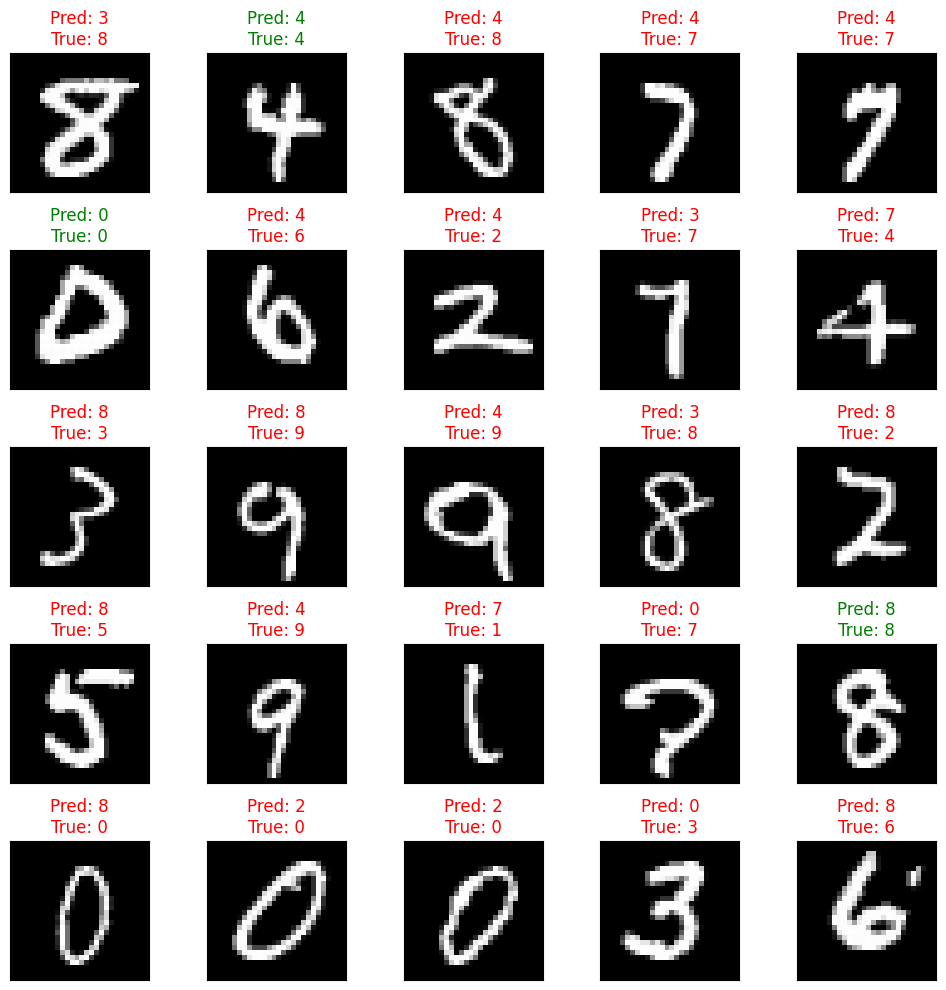

In [9]:
ann.test(test_loader)

In [17]:
ann.save("ann_model.pkl")

Model saved to models/ann_model.pkl


In [18]:
new_model = ArtificialNeuralNetwork()

In [20]:
new_model.load("ann_model.pkl")

Layer Name: Hidden Layer 0
None
Layer Name: Hidden Layer 1
None
Layer Name: Hidden Layer 2
None
Layer Name: Output Layer
None
Model loaded from models/ann_model.pkl


Test Accuracy: 12.09%, Time: 0.19s


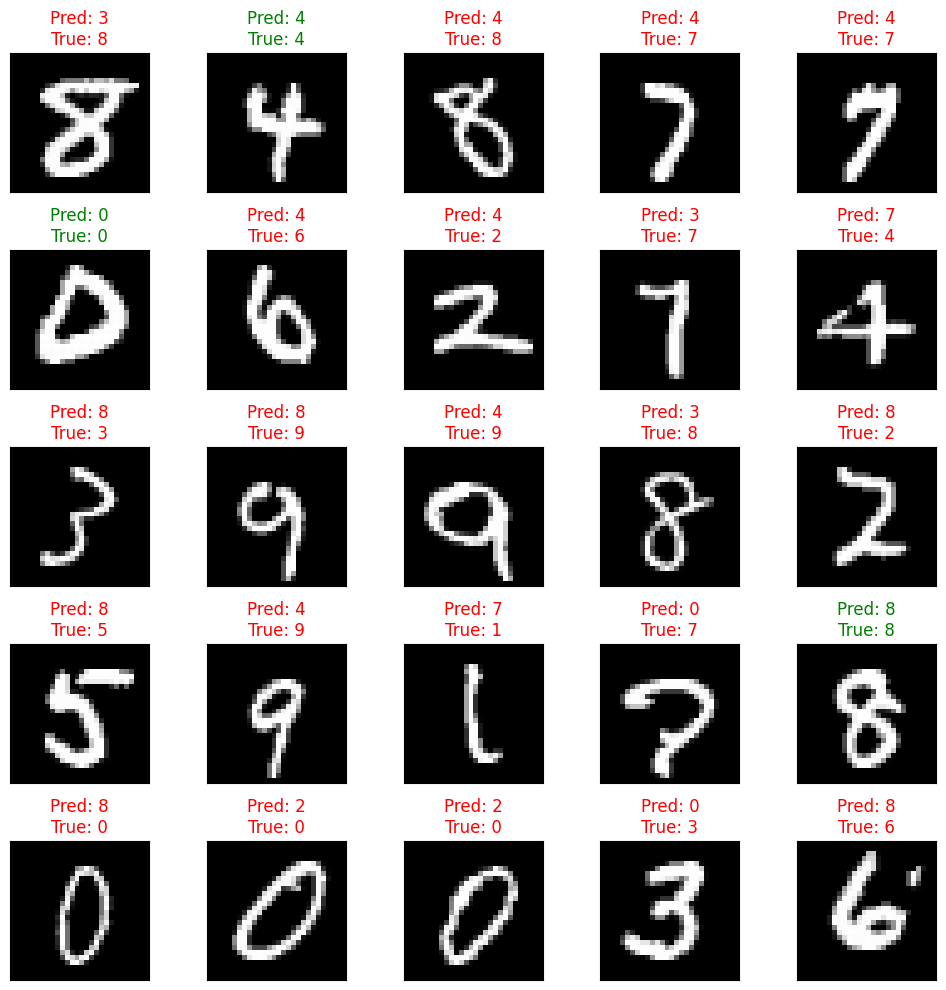

In [21]:
new_model.test(test_loader)